# Hands-On: FuseMedML and MultiModality

Welcome!

This notebook will guide you through the hands-on session.

## Session take-away
* Introduction to FuseMedML framework
* Introduction to multi-modality data and tasks
* Train multimodality based deep-learning model: demonstration of the integration of imaging and clinical data in skin lesion classification task


## Installation Details - Google Colab

### **Enable GPU Support**

To use GPU through Google Colab, change the runtime mode to GPU:

From the "Runtime" menu select "Change Runtime Type", choose "GPU" from the drop-down menu and click "SAVE"
When asked, reboot the system.

### **Clone hands-on session repsitory**

Type `!git clone https://github.com/IBM/fuse-med-ml.git`

Then, repen the notebook `fuse-med-ml/fuse_examples/tutorials/multimodality_image_clinical/multimodality_image_clinical.ipynb` in Google Colab

TODO: check if we need also `pip install ipykernel --upgrad`

### **Install FuseMedML**

In [1]:
!pip install fuse-med-ml

In [ ]:
!git clone https://github.com/IBM/fuse-med-ml.git
%cd fuse-med-ml
!git checkout multimodality_tutorial
!pip install -e .
%cd fuse_examples/tutorials/multimodality_image_clinical

## FuseMedML
[![Github repo](https://img.shields.io/static/v1?label=GitHub&message=FuseMedML&color=brightgreen)](https://github.com/IBM/fuse-med-ml)

[![PyPI version](https://badge.fury.io/py/fuse-med-ml.svg)](https://badge.fury.io/py/fuse-med-ml)

[![Slack channel](https://img.shields.io/badge/support-slack-slack.svg?logo=slack)](https://join.slack.com/t/newworkspace-i3g4445/shared_invite/zt-sr0hcb9f-E~SLYbG9bE5fn8iq5OE0ww)

[![Open Source](https://badges.frapsoft.com/os/v1/open-source.svg)](https://github.com/IBM/fuse-med-ml)


FuseMedML is an open-source python-based framework designed to enhance collaboration and accelerate discoveries in Fused Medical data through advanced Machine Learning technologies. 

Initial version is PyTorch-based and focuses on deep learning on medical imaging and digital pathology.

### **Why use FuseMedML?**
Successful deep learning R&D must rely on knowledge and experiments, accumulated over a wide variety of projects, and developed by different people and teams.

FuseMedML is an outstanding collaboration framework that allows you to rerun an experiment or reuse some of the capabilities originally written for different projects—all with minimal effort.\
Using FuseMedML, you can write generic components that can be easily shared between projects in a plug & play manner, simplfying sharing and collaboration.

The framework’s unique software design provides many advantages, making it an ideal framework for deep-learning research and development in medical imaging:

* **Rapid development**

* **Flexible, customizable, and scalable**

* **Encourage sharing and collaboration** 

* **Collection of common, easy to use, generic components and capabilities** 

* **Standardized evaluation**

* **Medical imaging expertise** 

* **Compatibility with alternative frameworks**

### **FuseMedML Key Concepts in a Nutshell**
### Decoupling
The decoupling is achieved by the fact that, in most cases, the objects do not interact directly. Instead, the information and data are routed between components using *namespaces* (examples below). 

Meaning, each object extracts its input from and saves its output into a dictionary named `batch_dict`. 

`batch_dict` aggregates the outputs of all the objects through a single batch. 

When a batch is completed, only the required key-value pairs from `batch_dict`, such as the loss values, will be collected in another dictionary named `epoch_results`.
 

Both `batch_dict` and `epoch_results` are nested dictionaries. To easily access the data stored in those dictionaries, use `FuseUtilsHierarchicalDict`:

```python
FuseUtilsHierarchicalDict.get(batch_dict, ‘model.output.classification’)
``` 

will return `batch_dict[‘model’][‘output’][‘classification’]`

**Example of the decoupling approach:**
```python
FuseMetricAUC(pred_name='model.output.classification', target_name='data.gt.classification')  
```

`FuseMetricAUC` will read the required tensors to compute AUC from `batch_dict`. The relevant dictionary keys are `pred_name` and `target_name`. 

This approach allows writing a generic metric which is completely independent of the model and data extractor. 

In addition, it allows to easily re-use this object in a plug & play manner without adding extra code. 

Such an approach also allows us to use it several times in case we have multiple heads/tasks.

### Share and Reuse
With just minimal code implementation, you can get a fully-featured pipeline up and running, form data handling, through training, inference and evaluation. 

Including caching, augmentation, monitoring, logging, and more. 

A common generic implementation, you can reuse, is provided for most components in the pipeline and all you need to do is implement specific components such as data extractors. 

The naming convention for the common implementation is `Fuse***Default` 

FuseMedML comes with a large collection of components that grow with each new project. Some of them are entirely generic and the others are domain specific.

The default implementation of modules and components suits many common cases. If needed, thanks to the fact that the components in the pipeline are decoupled, you can re-implement any component to achieve the required behavior.


Don't forget to **contribute** back and **share** them. 


### Use PyTorch directly and alternative frameworks

FuseMedML uses and extends PyTorch only when required by the user. 
You can mix FuseMedML with PyTorch code, components from alternative frameworks and other popular GitHub projects. 



<img src="fusemedml-release-plans.png" alt="drawing" width="100%"/>


## Multimodality
Radiologists never diagnose based solely on a single modality. The decision is made by combining information from various sources. Therefore, it is important to include such information in machine learning algorithms. 

Radiologists take into account clinical information such as the reason the scan was ordered. If needed, they can also examine other clinical information from the electronic health records of the hospital.  

Prior images are another type of data that is routinely used in radiology reading. Radiologists will often compare a current study with imaging or other tests done in the past to assess change.

It is also a common practice to consider findings from several imaging modalities when making a diagnosis. Each reveals different aspects and attributes of the suspicious finding.

In this session, we will demonstrate two simple yet effective methods to integrate clinical data.
In all cases and in general, the clinical data should first be pre-processed, normalized, etc.

<img src="arch.png" alt="drawing" width="70%"/>

* **Imaging only implementation**

* **Imaging and Tabular data - concatenate tabular data after image feature extraction**

    The tabular data is integrated after feature extraction, done by a convolutional network followed by a pooling layer that extracts non-spatial features from the image.


* **Imaging and Tabular data - concatenate directly with the image**

    The tabular data is integrated at the beginning of the network by adding more channels to the input image. Each channel represents a single bit in the one-hot vector. 

    This method of integrating clinical features provides the network with the ability to extract better features using the backbone, in contrast to the standard way of integrating this data only after feature extraction.




## Task - ISIC 2019 challenge to classify dermoscopic images and clinical data among nine different diagnostic categories.

This task was chosen for demonstration since the data is simple and public, which will make the session more effective.

We explored the effectiveness of each method in two different tasks:
* Article: "Context in medical imaging: the case of focal liver lesion classification" - soon to be published
* FuseMedML example on [Duke dataset](https://sites.duke.edu/mazurowski/resources/breast-cancer-mri-dataset/) - will be published in FuseMedML repository.

Skin cancer is the most common cancer globally, with melanoma being the most deadly form. 

Dermoscopy is a skin imaging modality that has demonstrated improvement for the diagnosis of skin cancer compared to unaided visual inspection. 

However, clinicians should receive adequate training for those improvements to be realized.

In order to make expertise more widely available, the International Skin Imaging Collaboration (ISIC) has developed the ISIC Archive, 

an international repository of dermoscopic images, for both the purposes of clinical training, and for supporting technical research toward automated algorithmic analysis by hosting the ISIC Challenges.

The goal for ISIC 2019 is to classify dermoscopic images among nine different diagnostic categories:

* Melanoma
* Melanocytic nevus
* Basal cell carcinoma
* Actinic keratosis
* Benign keratosis (solar lentigo / seborrheic keratosis / lichen planus-like keratosis)
* Dermatofibroma
* Vascular lesion
* Squamous cell carcinoma
* None of the others

25,331 images are available for training across 8 different categories.

Two tasks were available for participation:
* classify dermoscopic images without meta-data,
* classify images with additional available meta-data, including age, gender and anatomic site

### Data

In [2]:
%cd fuse-med-ml/fuse_examples/tutorials/multimodality_image_clinical
!export PYTHONPATH=$PYTHONPATH:$(pwd)
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from fuse.utils.utils_logger import fuse_logger_start
import logging
fuse_logger_start(output_path=None, console_verbose_level=logging.INFO)
size=400


Fuse: 20/10/21 17:27:00


In [3]:
print("It might take few miuntes")

from download import download_and_extract_isic
download_and_extract_isic(size<=400)

It might take few miuntes
Training Input Path: /projects/msieve_dev3/usr/moshikor/git_repos/fuse-med-ml/fuse_examples/tutorials/multimodality_image_clinical/data/ISIC2019/ISIC_2019_Training_Input
Training Metadata Path: /projects/msieve_dev3/usr/moshikor/git_repos/fuse-med-ml/fuse_examples/tutorials/multimodality_image_clinical/data/ISIC2019/ISIC_2019_Training_Metadata.csv
Training Metadata Path: /projects/msieve_dev3/usr/moshikor/git_repos/fuse-med-ml/fuse_examples/tutorials/multimodality_image_clinical/data/ISIC2019/ISIC_2019_Training_GroundTruth.csv


In [4]:
# explain about FuseMedML data pipeline
from dataset import isic_2019_dataset

train_dl, valid_dl = isic_2019_dataset(size=size, reset_cache=True, post_cache_processing_func=None)


- Load and cache data:
FuseDatasetDefault: caching 280 out of 280


100%|██████████| 280/280 [00:27<00:00, 10.37it/s]


FuseDatasetDefault: caching done
- Load and cache data: Done
- Create sampler:


100%|██████████| 280/280 [00:03<00:00, 72.18it/s]


- Create sampler: Done
Train Data: Done {'attrs': 'bold'}
Validation Data: {'attrs': 'bold'}
- Load and cache data:
FuseDatasetDefault: caching 120 out of 120


100%|██████████| 120/120 [00:05<00:00, 23.18it/s]


FuseDatasetDefault: caching done
- Load and cache data: Done
Validation Data: Done {'attrs': 'bold'}


------------------------------------------
{'data.input.clinical': {'image': 'ISIC_0072650', 'age_approx': 30.0, 'anatom_site_general': 'anterior torso', 'lesion_id': 'BCN_0003356', 'sex': 'male'}}
image label = tensor(1)
------------------------------------------


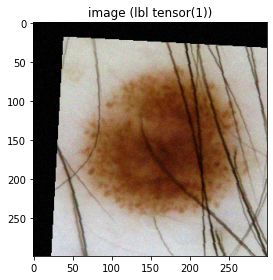

In [5]:
%matplotlib inline
train_dl.dataset.visualize(10)

------------------------------------------
original
{'data.input.clinical': {'image': 'ISIC_0072650', 'age_approx': 30.0, 'anatom_site_general': 'anterior torso', 'lesion_id': 'BCN_0003356', 'sex': 'male'}}
image label = tensor(1)
augmented
{'data.input.clinical': {'image': 'ISIC_0072650', 'age_approx': 30.0, 'anatom_site_general': 'anterior torso', 'lesion_id': 'BCN_0003356', 'sex': 'male'}}
image label = tensor(1)
------------------------------------------


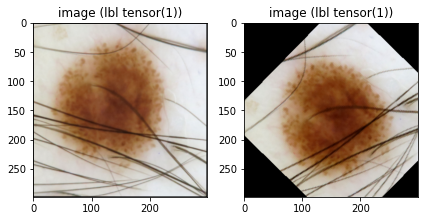

In [6]:
train_dl.dataset.visualize_augmentation(10)

In [7]:
print(train_dl.dataset.summary(["data.gt.gt_global.tensor"]))

100%|██████████| 280/280 [00:03<00:00, 83.04it/s]

Class = fuse.data.dataset.dataset_default.FuseDatasetDefault
Processors:
------------------------
{'input': {'image': <input_processor.FuseSkinInputProcessor object at 0x7f1760033198>, 'clinical': <fuse.data.processor.processor_csv.FuseProcessorCSV object at 0x7f175f30f0f0>}, 'gt': {'gt_global': <ground_truth_processor.FuseSkinGroundTruthProcessor object at 0x7f1596fc3ef0>}}
Cache destination:
------------------
cache
Augmentor:
----------
Class = (<fuse.data.augmentor.augmentor_default.FuseAugmentorDefault object at 0x7f17600270b8>, <class 'fuse.data.augmentor.augmentor_default.FuseAugmentorDefault'>)
Pipeline = [[('data.input.image',), '<function aug_op_affine at 0x7f158340dae8>', {'rotate': 'RandUniform [-180.0 - 180.0] ', 'translate': ('RandInt [-50 - 50] ', 'RandInt [-50 - 50] '), 'flip': ('RandBool p=0.3] ', 'RandBool p=0.3] '), 'scale': 'RandUniform [0.9 - 1.1] '}, {'apply': 'RandBool p=0.9] '}], [('data.input.image',), '<function aug_op_color at 0x7f151ad47158>', {'add': 'RandU

### Imaging Only Implementation

In [8]:

from fuse.models.model_default import FuseModelDefault
from fuse.models.heads.head_global_pooling_classifier import FuseHeadGlobalPoolingClassifier
from fuse.models.backbones.backbone_inception_resnet_v2 import FuseBackboneInceptionResnetV2

model = FuseModelDefault(
    conv_inputs=(('data.input.image', 3),),
    backbone=FuseBackboneInceptionResnetV2(input_channels_num=3),
    heads=[
        FuseHeadGlobalPoolingClassifier(head_name='head_0',
                                        dropout_rate=0.5,
                                        conv_inputs=[('model.backbone_features', 384)],
                                        layers_description=(256,),
                                        num_classes=8,
                                        pooling="avg"),
    ]
)

In [9]:
import torch.nn.functional as F
from fuse.losses.loss_default import FuseLossDefault
from fuse.metrics.classification.metric_auc import FuseMetricAUC
from fuse.metrics.classification.metric_accuracy import FuseMetricAccuracy
from fuse.metrics.classification.metric_confusion import FuseMetricConfusion

# ====================================================================================
#  Loss
# ====================================================================================
losses = {
    'cls_loss': FuseLossDefault(pred_name='model.logits.head_0', target_name='data.gt.gt_global.tensor',
                                callable=F.cross_entropy, weight=1.0)
}

# ====================================================================================
# Metrics
# ====================================================================================
metrics = {
    'auc': FuseMetricAUC(pred_name='model.output.head_0', target_name='data.gt.gt_global.tensor'),
    'accuracy': FuseMetricAccuracy(pred_name='model.output.head_0', target_name='data.gt.gt_global.tensor'),
    "balanced_acc": FuseMetricConfusion(pred_name='model.output.head_0', target_name='data.gt.gt_global.tensor')
}

best_epoch_source = {
    'source': 'metrics.balanced_acc.sensitivity_macro_avg',  # can be any key from losses or metrics dictionaries
    'optimization': 'max',  # can be either min/max
}

In [10]:
import torch.optim as optim
from fuse.managers.manager_default import FuseManagerDefault

# create optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-5,
                        weight_decay=0.001)

# create scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer)

# train from scratch
manager = FuseManagerDefault(output_model_dir="model_dir", force_reset=True)
# Providing the objects required for the training process.
manager.set_objects(net=model,
                    optimizer=optimizer,
                    losses=losses,
                    metrics=metrics,
                    best_epoch_source=best_epoch_source,
                    lr_scheduler=scheduler,
                    callbacks={},
                    train_params={'num_epochs': 2},
                    output_model_dir="model_dir")

# Start training
manager.train(train_dataloader=train_dl,
                validation_dataloader=valid_dl)

Key device not found in config parameter, setting value to default (cuda)
Key virtual_batch_size not found in config parameter, setting value to default (1)
Key gap_between_saving_epochs not found in config parameter, setting value to default (5)
Key start_saving_epochs not found in config parameter, setting value to default (80)
Key lr_sch_target not found in config parameter, setting value to default (train.losses.total_loss)
Total number of parameters in model:7,818,600, trainable parameters:7,818,600
Train Dataset Summary:
Class = fuse.data.dataset.dataset_default.FuseDatasetDefault
Processors:
------------------------
{'input': {'image': <input_processor.FuseSkinInputProcessor object at 0x7f1760033198>, 'clinical': <fuse.data.processor.processor_csv.FuseProcessorCSV object at 0x7f175f30f0f0>}, 'gt': {'gt_global': <ground_truth_processor.FuseSkinGroundTruthProcessor object at 0x7f1596fc3ef0>}}
Cache destination:
------------------
cache
Augmentor:
----------
Class = (<fuse.data.aug

100%|██████████| 15/15 [00:01<00:00, 13.55it/s]


Start training on epoch 1


100%|██████████| 88/88 [00:12<00:00,  6.79it/s]


Start validation on epoch 1


100%|██████████| 15/15 [00:00<00:00, 22.08it/s]


This is the best epoch ever (metrics.balanced_acc.sensitivity_macro_avg = 0.11463032581453633)
Stats for epoch: 1 (Currently the best epoch for source metrics.balanced_acc.sensitivity_macro_avg!)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|                                           | Best Epoch Value                          | Current Epoch Validation                  | Current Epoch Train                       |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| losses.cls_loss                           | 2.0564                                    | 2.0564                                    | 2.0809                                    |
---------------------------------------------------------------------------------------------

### Imaging and Tabular data - concatenate tabular data after image feature extraction ###

In [11]:
from fuse.utils.utils_hierarchical_dict import FuseUtilsHierarchicalDict
import torch
from dataset import ANATOM_SITE_INDEX, SEX_INDEX

### Generate Data
def post_cache_processing_clinical_encoding(sample_dict: dict) -> dict:
    age = FuseUtilsHierarchicalDict.get(sample_dict, 'data.input.clinical.age_approx')
    if age > 0 and age < 120:
        age = torch.tensor(age / 120.0).reshape(-1)
    else:
        age = torch.tensor(-1.0).reshape(-1)
    
    anatom_site = FuseUtilsHierarchicalDict.get(sample_dict, 'data.input.clinical.anatom_site_general')
    anatom_site_one_hot = torch.zeros(len(ANATOM_SITE_INDEX))
    if anatom_site in ANATOM_SITE_INDEX:
        anatom_site_one_hot[ANATOM_SITE_INDEX[anatom_site]] = 1
    
    sex = FuseUtilsHierarchicalDict.get(sample_dict, 'data.input.clinical.sex')
    sex_one_hot = torch.zeros(len(SEX_INDEX))
    if sex in SEX_INDEX:
        sex_one_hot[SEX_INDEX[sex]] = 1
    
    clinical_encoding = torch.cat((age, anatom_site_one_hot, sex_one_hot), dim=0)
    FuseUtilsHierarchicalDict.set(sample_dict, "data.input.clinical.all", clinical_encoding)

    return sample_dict


train_dl, valid_dl = isic_2019_dataset(size=size, reset_cache=False, post_cache_processing_func=post_cache_processing_clinical_encoding)

### Define model
model = FuseModelDefault(
    conv_inputs=(('data.input.image', 3),),
    backbone=FuseBackboneInceptionResnetV2(input_channels_num=3),
    heads=[
        FuseHeadGlobalPoolingClassifier(head_name='head_0',
                                        dropout_rate=0.5,
                                        conv_inputs=[('model.backbone_features', 384)],
                                        tabular_data_inputs=[("data.input.clinical.all", 11)],
                                        layers_description=(256,),
                                        tabular_layers_description=(128,),
                                        num_classes=8,
                                        pooling="avg"),
    ]
)



### Strart a training process
manager = FuseManagerDefault(output_model_dir="model_dir", force_reset=True)
# Providing the objects required for the training process.
manager.set_objects(net=model,
                    optimizer=optimizer,
                    losses=losses,
                    metrics=metrics,
                    best_epoch_source=best_epoch_source,
                    lr_scheduler=scheduler,
                    callbacks={},
                    train_params={'num_epochs': 2},
                    output_model_dir="model_dir")

# Start training
manager.train(train_dataloader=train_dl,
                validation_dataloader=valid_dl)

- Load and cache data:
FuseDatasetDefault: all 280 samples are already cached
- Load and cache data: Done
- Create sampler:


100%|██████████| 280/280 [00:03<00:00, 81.64it/s]

- Create sampler: Done
Train Data: Done {'attrs': 'bold'}
Validation Data: {'attrs': 'bold'}
- Load and cache data:
FuseDatasetDefault: all 120 samples are already cached


- Load and cache data: Done
Validation Data: Done {'attrs': 'bold'}
Key device not found in config parameter, setting value to default (cuda)
Key virtual_batch_size not found in config parameter, setting value to default (1)
Key gap_between_saving_epochs not found in config parameter, setting value to default (5)
Key start_saving_epochs not found in config parameter, setting value to default (80)
Key lr_sch_target not found in config parameter, setting value to default (train.losses.total_loss)
Total number of parameters in model:7,852,904, trainable parameters:7,852,904
Train Dataset Summary:
Class = fuse.data.dataset.dataset_default.FuseDatasetDefault
Processors:
------------------------
{'input': {'image': <input_processor.FuseSkinInputProcessor object at 0x7f17408d72b0>, 'clinical': <fuse.data.processor.processor_csv.FuseProcessorCSV object at 0x7f16e428e5f8>}, 'gt': {'gt_global': <ground_truth_processor.FuseSkinGroundTruthProcessor object at 0x7f16e428e278>}}
Cache destination:
--

100%|██████████| 15/15 [00:00<00:00, 22.91it/s]


Start training on epoch 1


100%|██████████| 88/88 [00:13<00:00,  6.74it/s]


Start validation on epoch 1


100%|██████████| 15/15 [00:00<00:00, 22.79it/s]


This is the best epoch ever (metrics.balanced_acc.sensitivity_macro_avg = 0.1625)
Stats for epoch: 1 (Currently the best epoch for source metrics.balanced_acc.sensitivity_macro_avg!)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|                                           | Best Epoch Value                          | Current Epoch Validation                  | Current Epoch Train                       |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| losses.cls_loss                           | 2.0781                                    | 2.0781                                    | 2.0863                                    |
----------------------------------------------------------------------------------------------------------

### Imaging and Tabular data - concatenate directly with the image

In [12]:
### Generate Data
def post_cache_processing_clinical_pad_to_image(sample_dict: dict) -> dict:
    sample_dict = post_cache_processing_clinical_encoding(sample_dict)
    clinical_encodging = FuseUtilsHierarchicalDict.get(sample_dict, "data.input.clinical.all")
    image = FuseUtilsHierarchicalDict.get(sample_dict, "data.input.image")

    clinical_data_spatial = clinical_encodging.reshape((clinical_encodging.shape + (1,1))).repeat((1,) + image.shape[1:]) # repeat and reshape to [num_features, H, W]
    image = torch.cat((image, clinical_data_spatial), dim=0) # concat to get [num_features + 3, H, W]

    FuseUtilsHierarchicalDict.set(sample_dict, "data.input.image", image)

    return sample_dict

train_dl, valid_dl = isic_2019_dataset(size=size, reset_cache=False, post_cache_processing_func=post_cache_processing_clinical_pad_to_image)

### Define model
model = FuseModelDefault(
    conv_inputs=(('data.input.image', 14),),
    backbone=FuseBackboneInceptionResnetV2(input_channels_num=14),
    heads=[
        FuseHeadGlobalPoolingClassifier(head_name='head_0',
                                        dropout_rate=0.5,
                                        conv_inputs=[('model.backbone_features', 384)],
                                        layers_description=(256,),
                                        num_classes=8,
                                        pooling="avg"),
    ]
)



### Strart a training process
manager = FuseManagerDefault(output_model_dir="model_dir", force_reset=True)
# Providing the objects required for the training process.
manager.set_objects(net=model,
                    optimizer=optimizer,
                    losses=losses,
                    metrics=metrics,
                    best_epoch_source=best_epoch_source,
                    lr_scheduler=scheduler,
                    callbacks={},
                    train_params={'num_epochs': 2},
                    output_model_dir="model_dir")

# Start training
manager.train(train_dataloader=train_dl,
                validation_dataloader=valid_dl)

- Load and cache data:
FuseDatasetDefault: all 280 samples are already cached
- Load and cache data: Done
- Create sampler:


100%|██████████| 280/280 [00:05<00:00, 54.29it/s]

- Create sampler: Done
Train Data: Done {'attrs': 'bold'}
Validation Data: {'attrs': 'bold'}
- Load and cache data:
FuseDatasetDefault: all 120 samples are already cached


- Load and cache data: Done
Validation Data: Done {'attrs': 'bold'}
Key device not found in config parameter, setting value to default (cuda)
Key virtual_batch_size not found in config parameter, setting value to default (1)
Key gap_between_saving_epochs not found in config parameter, setting value to default (5)
Key start_saving_epochs not found in config parameter, setting value to default (80)
Key lr_sch_target not found in config parameter, setting value to default (train.losses.total_loss)
Total number of parameters in model:7,821,768, trainable parameters:7,821,768
Train Dataset Summary:
Class = fuse.data.dataset.dataset_default.FuseDatasetDefault
Processors:
------------------------
{'input': {'image': <input_processor.FuseSkinInputProcessor object at 0x7f16e42ec9e8>, 'clinical': <fuse.data.processor.processor_csv.FuseProcessorCSV object at 0x7f16e42e26d8>}, 'gt': {'gt_global': <ground_truth_processor.FuseSkinGroundTruthProcessor object at 0x7f16e42e2240>}}
Cache destination:
--

100%|██████████| 15/15 [00:01<00:00, 12.32it/s]


Start training on epoch 1


100%|██████████| 88/88 [00:14<00:00,  6.12it/s]


Start validation on epoch 1


100%|██████████| 15/15 [00:00<00:00, 15.01it/s]


Stats for epoch: 1 (Best epoch is 0 for source metrics.balanced_acc.sensitivity_macro_avg)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|                                           | Best Epoch Value                          | Current Epoch Validation                  | Current Epoch Train                       |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| losses.cls_loss                           | 2.0564                                    | 2.0772                                    | 2.0810                                    |
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| losses.total_loss  